In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Checking Prescribed SFR

In [124]:
from Chempy.parameter import ModelParameters
from Chempy.sfr import SFR
from Chempy.solar_abundance import solar_abundances

a = ModelParameters()

basic_solar = solar_abundances()
getattr(basic_solar, a.solar_abundance_name)() 

basic_sfr = SFR(0,13.5,136)
getattr(basic_sfr, a.basic_sfr_name)(S0 = a.S_0 * a.mass_factor,
                                     a_parameter = a.a_parameter, 
                                     loc = a.sfr_beginning, 
                                     scale = a.sfr_scale)

a.basic_sfr_index = 2
a.basic_sfr_name = 'prescribed'
a.mass_factor = 1.
a.name_of_file = '../Chempy/input/Daniel_Weisz/ic1613.lcid.final.sfh'

prescribed_sfr = SFR(0,13.5,136)
getattr(prescribed_sfr, a.basic_sfr_name)(mass_factor = a.mass_factor,
                                          name_of_file = a.name_of_file)

In [304]:
total_mass = np.trapz(prescribed_sfr.sfr,prescribed_sfr.t)

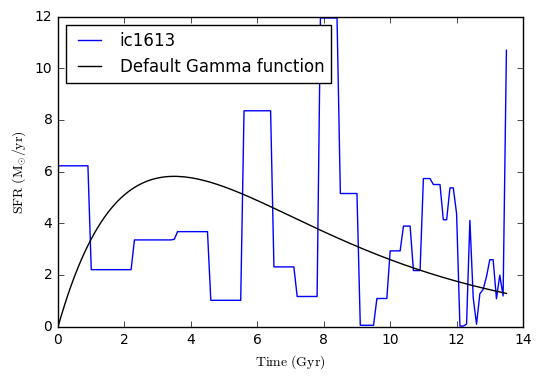

In [402]:
plt.plot(prescribed_sfr.t,prescribed_sfr.sfr,label='ic1613')
plt.plot(basic_sfr.t,basic_sfr.sfr*total_mass,color='black',label='Default Gamma function')
#plt.plot(basic_sfr.t,basic_sfr.sfr)
plt.xlabel(r'$\rm{Time\ (Gyr)}$')
plt.ylabel(r'$\rm{SFR}\ (\rm{M}_{\odot}/\rm{yr})$')
plt.legend(loc=2)


savefig('ic1613_SFR.png', bbox_inches='tight')

Seems to pull out the correct SFH just fine

# Enrichment Channels 

[0]

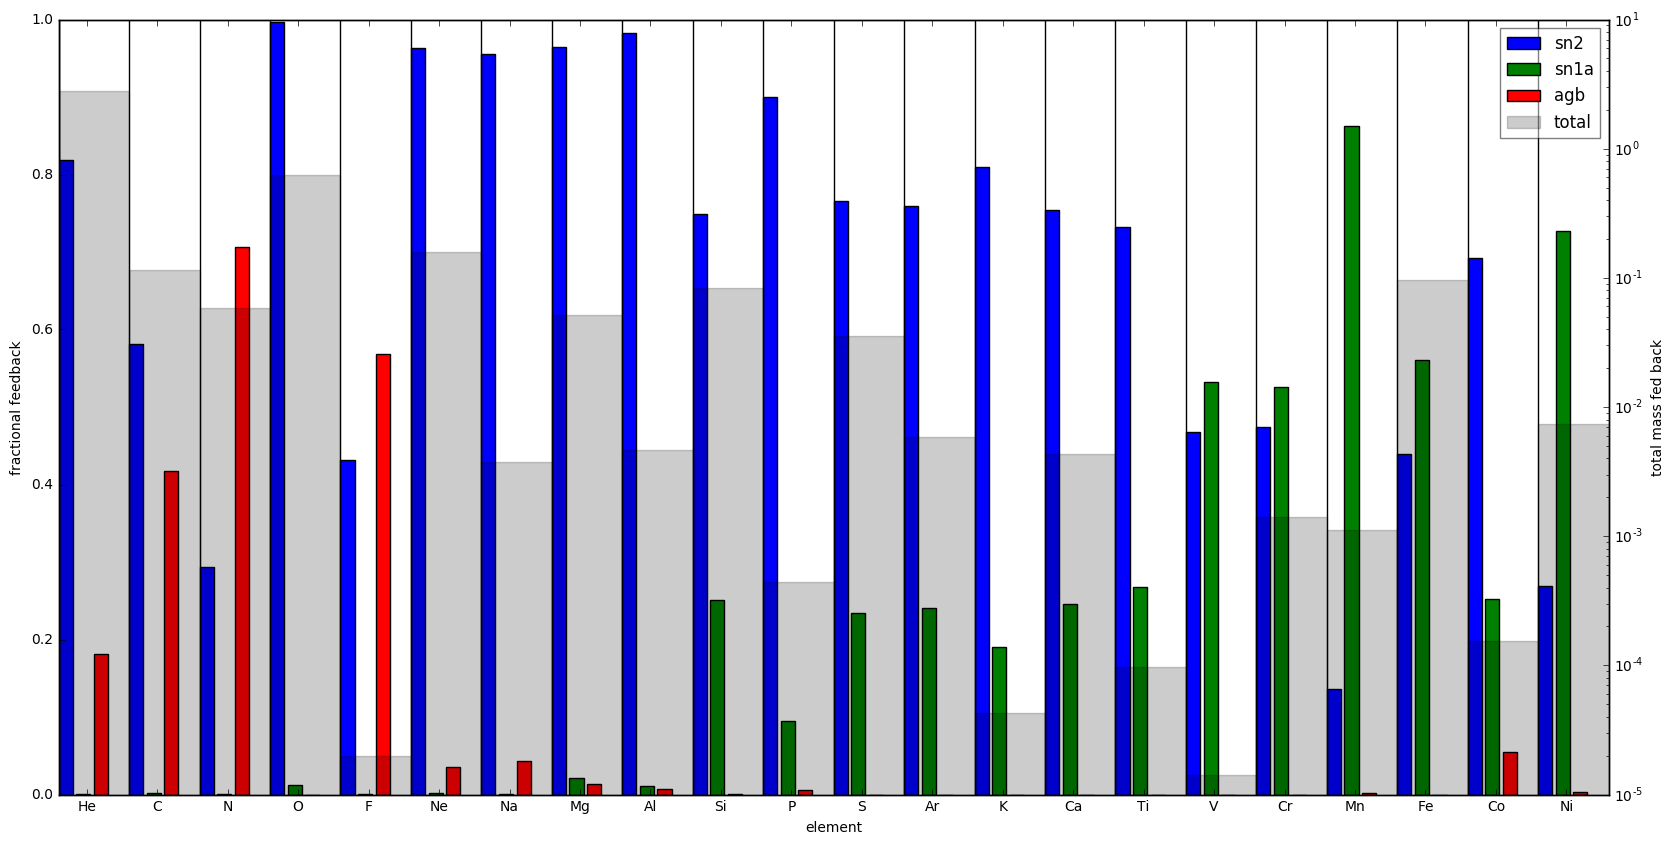

In [301]:
from Chempy.data_to_test import plot_processes
plot_processes(True,a.name_string,cube541.sn2_cube,cube541.sn1a_cube,cube541.agb_cube,a.element_names,np.copy(cube541),a.number_of_models_overplotted)

# Time Resolution

In [364]:
from Chempy.wrapper import Chempy

selection = np.load("../Chempy/input/selection/red_clump_new.npy")
time_selection = np.load("../Chempy/input/selection/time_red_clump_new.npy")

a = ModelParameters()
a.time_steps = 541
a.name_infall_index = 0
a.name_infall = 'primordial'
a.basic_sfr_index = 2
a.basic_sfr_name = 'prescribed'
a.mass_factor = 1.
a.name_of_file = '../Chempy/input/Daniel_Weisz/ic1613.lcid.final.sfh'
a.total_mass = total_mass

cube541, abundances541 = Chempy(a)
selection541 = np.interp(cube541.cube['time'], time_selection[::-1], selection)

a = ModelParameters()
a.time_steps = 136
a.name_infall_index = 0
a.name_infall = 'primordial'
a.basic_sfr_index = 2
a.basic_sfr_name = 'prescribed'
a.mass_factor = 1.
a.name_of_file = '../Chempy/input/Daniel_Weisz/ic1613.lcid.final.sfh'
a.total_mass = total_mass

cube136, abundances136 = Chempy(a)

a = ModelParameters()
a.time_steps = 28
a.name_infall_index = 0
a.name_infall = 'primordial'
a.basic_sfr_index = 2
a.basic_sfr_name = 'prescribed'
a.mass_factor = 1.
a.name_of_file = '../Chempy/input/Daniel_Weisz/ic1613.lcid.final.sfh'
a.total_mass = total_mass

cube28, abundances28 = Chempy(a)

a = ModelParameters()
a.time_steps = 541
a.total_mass = total_mass

cubebasic541, abundancesbasic541 = Chempy(a)
selectionbasic541 = np.interp(cubebasic541.cube['time'], time_selection[::-1], selection)

/Users/Nathan/anaconda/lib/python3.5/site-packages/Chempy/making_abundances.py:54: RuntimeWarning: divide by zero encountered in log10
  cube_abundances[item] = np.where(cube_abundances[item] == 0. , -np.inf, np.log10(cube_abundances[item]) + 12.)
/Users/Nathan/anaconda/lib/python3.5/site-packages/Chempy/making_abundances.py:54: RuntimeWarning: invalid value encountered in log10
  cube_abundances[item] = np.where(cube_abundances[item] == 0. , -np.inf, np.log10(cube_abundances[item]) + 12.)


### Star Selection (Time Resolution)

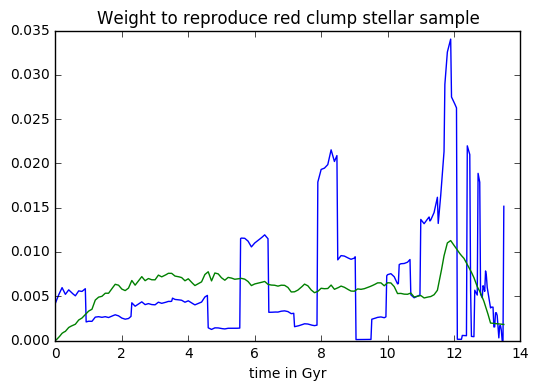

In [365]:
weight = cube541.cube['sfr']*selection541
plt.plot(cube541.cube['time'],weight,label='Prescribed')
weight = cubebasic541.cube['sfr']*selectionbasic541
plt.plot(cubebasic541.cube['time'],weight,label='Default')

plt.xlabel('time in Gyr')
plt.title('Weight to reproduce red clump stellar sample')
plt.show()

In [380]:
from Chempy.data_to_test import sample_stars

sample_size = 1000
x541,y541 = sample_stars(cube541.cube['sfr'][1:],selection541[1:],abundances541['Fe'][1:],abundances541['O'][1:]-abundances541['Fe'][1:],float(basic_solar.table['error'][np.where(basic_solar.table['Symbol']=='Fe')]),float(basic_solar.table['error'][np.where(basic_solar.table['Symbol']=='O')]),int(sample_size))
xbasic541,ybasic541 = sample_stars(cubebasic541.cube['sfr'][1:],selectionbasic541[1:],abundancesbasic541['Fe'][1:],abundancesbasic541['O'][1:]-abundancesbasic541['Fe'][1:],float(basic_solar.table['error'][np.where(basic_solar.table['Symbol']=='Fe')]),float(basic_solar.table['error'][np.where(basic_solar.table['Symbol']=='O')]),int(sample_size))

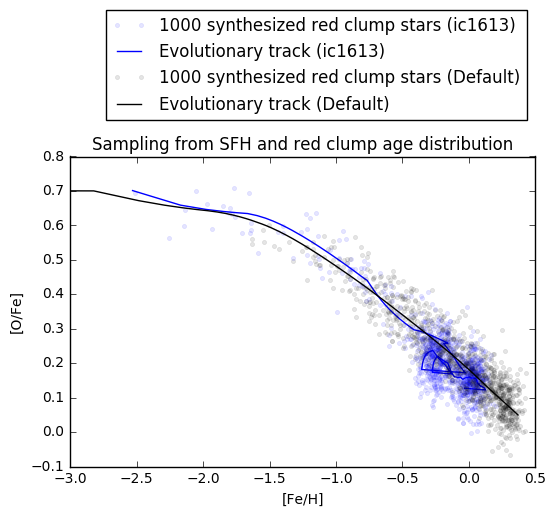

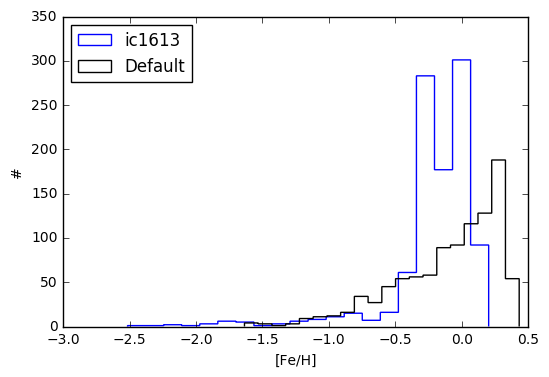

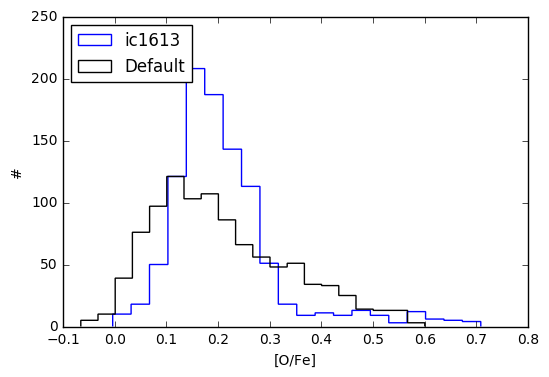

In [407]:
plt.plot(x541,y541,"b.", alpha = 0.1, label = '%d synthesized red clump stars (ic1613)' %(int(sample_size)))
plt.plot(abundances541['Fe'][1:],abundances541['O'][1:]-abundances541['Fe'][1:], 'b', label = 'Evolutionary track (ic1613)')
plt.plot(xbasic541,ybasic541,'k.', alpha = 0.1, label = '%d synthesized red clump stars (Default)' %(int(sample_size)))
plt.plot(abundancesbasic541['Fe'][1:],abundancesbasic541['O'][1:]-abundancesbasic541['Fe'][1:], 'black', label = 'Evolutionary track (Default)')
plt.xlabel('[Fe/H]')
plt.ylabel('[O/Fe]')
plt.title("Sampling from SFH and red clump age distribution")
plt.legend(bbox_to_anchor = [1,1.5])
plt.xlim(-3,0.5)
plt.savefig('ic1613_RC_[O-Fe]_[Fe-H].png', bbox_inches='tight')
plt.show()

plt.hist(x541,20,histtype='step',label='ic1613')
plt.hist(xbasic541,20,color='black',histtype='step',label='Default')
plt.xlabel('[Fe/H]')
plt.ylabel('#')
plt.legend(loc=2)
plt.savefig('ic1613_RC_MDF_[Fe-H].png', bbox_inches='tight')
plt.show()

plt.hist(y541,20,histtype='step',label='ic1613')
plt.hist(ybasic541,20,color='black',histtype='step',label='Default')
plt.xlabel('[O/Fe]')
plt.ylabel('#')
plt.legend(loc=2)
plt.savefig('ic1613_RC_MDF_[O-Fe].png', bbox_inches='tight')
plt.show()

### SFH (v. Time Resolution)

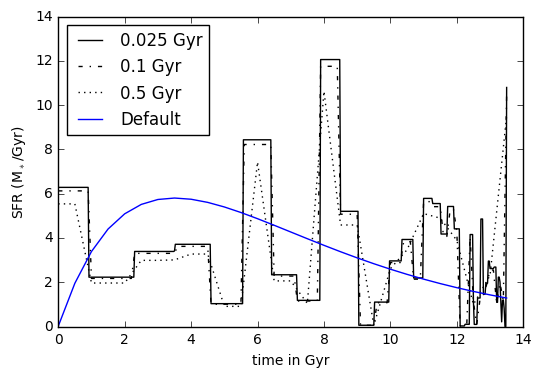

In [306]:
plt.plot(cube541.cube['time'],cube541.cube['sfr']/0.025,color='black',linestyle='solid',label='0.025 Gyr')
plt.plot(cube136.cube['time'],cube136.cube['sfr']/0.1,color='black',linestyle='-.',label='0.1 Gyr')
plt.plot(cube28.cube['time'],cube28.cube['sfr']/0.5,color='black',linestyle='dotted',label='0.5 Gyr')
plt.plot(cubebasic28.cube['time'],cubebasic28.cube['sfr']/0.5,color='blue',label='Default')
plt.xlabel('time in Gyr')
plt.ylabel(r'SFR (M$_*$/Gyr)')
plt.legend(loc=2)

plt.savefig('Prescribed_SFR_timestep.png', bbox_inches='tight')

### Stellar & Gas Mass (v. Time Resolution)

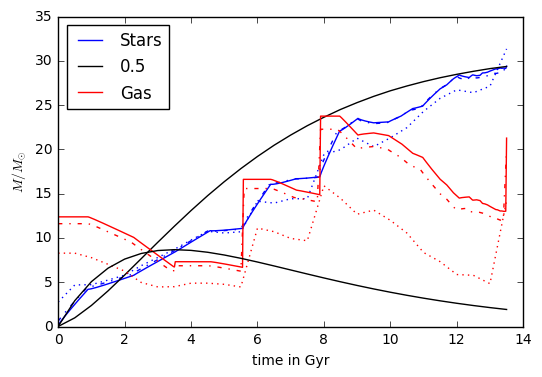

In [307]:
plt.plot(cube541.cube['time'],cube541.cube['stars'],color='blue',linestyle='solid',label='Stars')
plt.plot(cube136.cube['time'],cube136.cube['stars'],color='blue',linestyle='-.')
plt.plot(cube28.cube['time'],cube28.cube['stars'],color='blue',linestyle='dotted')
plt.plot(cubebasic28.cube['time'],cubebasic28.cube['stars'],color='black',label='0.5')
plt.plot(cube541.cube['time'],cube541.cube['gas'],color='red',linestyle='solid',label='Gas')
plt.plot(cube136.cube['time'],cube136.cube['gas'],color='red',linestyle='-.')
plt.plot(cube28.cube['time'],cube28.cube['gas'],color='red',linestyle='dotted')
plt.plot(cubebasic28.cube['time'],cubebasic28.cube['gas'],color='black')

plt.xlabel('time in Gyr')
plt.ylabel(r'$M/M_{\odot}$')
plt.legend(loc=2)

### Metallicity Evolution (v. Time Resolution)

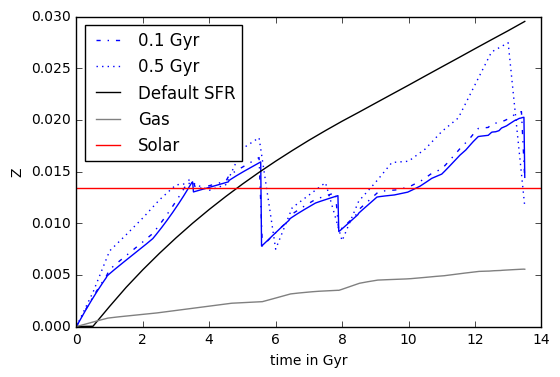

In [349]:
plt.plot(cube541.cube['time'],cube541.cube['Z'],color='blue',linestyle='solid')
plt.plot(cube136.cube['time'],cube136.cube['Z'],color='blue',linestyle='-.',label='0.1 Gyr')
plt.plot(cube28.cube['time'],cube28.cube['Z'],color='blue',linestyle='dotted',label='0.5 Gyr')
plt.plot(cubebasic28.cube['time'],cubebasic28.cube['Z'],color='black',label='Default SFR')

plt.plot(cube541.gas_reservoir['time'],cube541.gas_reservoir['Z'],color='gray',label='Gas')

plt.plot((0,14),(basic_solar.z,basic_solar.z),color='r',label='Solar')

plt.xlabel('time in Gyr')
plt.ylabel('Z')
plt.legend(loc=2)


### Abundance Evolution (v. Time Resolution)

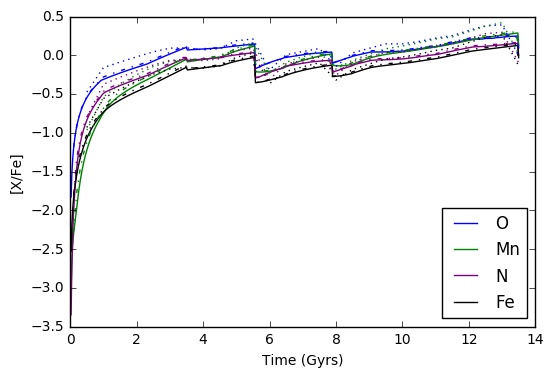

In [310]:
plot(abundances541['time'][1:],abundances541['O'][1:],linestyle='solid',color='blue',  label='O')
plot(abundances541['time'][1:],abundances541['Mn'][1:],linestyle='solid',color='green', label='Mn')
plot(abundances541['time'][1:],abundances541['N'][1:],linestyle='solid',color='purple',label='N')
plot(abundances541['time'][1:],abundances541['Fe'][1:],linestyle='solid',color='black',label='Fe')

plot(abundances136['time'][1:],abundances136['O'][1:],linestyle='-.',color='blue'  )
plot(abundances136['time'][1:],abundances136['Mn'][1:],linestyle='-.',color='green' )
plot(abundances136['time'][1:],abundances136['N'][1:],linestyle='-.',color='purple')
plot(abundances136['time'][1:],abundances136['Fe'][1:],linestyle='-.',color='black')

plot(abundances28['time'][1:],abundances28['O'][1:],linestyle='dotted',color='blue'  )
plot(abundances28['time'][1:],abundances28['Mn'][1:],linestyle='dotted',color='green' )
plot(abundances28['time'][1:],abundances28['N'][1:],linestyle='dotted',color='purple')
plot(abundances28['time'][1:],abundances28['Fe'][1:],linestyle='dotted',color='black')

plt.xlabel('Time (Gyrs)')
plt.ylabel('[X/Fe]')
plt.legend(loc=4)

### Relative Abundance (v. Time Resolution)

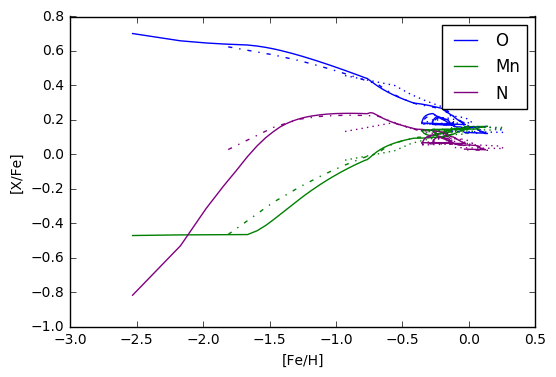

In [312]:
plot(abundances541['Fe'][1:],abundances541['O'][1:]-abundances541['Fe'][1:] ,color='blue'  ,linestyle='solid', label = 'O')
plot(abundances541['Fe'][1:],abundances541['Mn'][1:]-abundances541['Fe'][1:],color='green' ,linestyle='solid', label = 'Mn')
plot(abundances541['Fe'][1:],abundances541['N'][1:]-abundances541['Fe'][1:] ,color='purple',linestyle='solid', label = 'N')

plot(abundances136['Fe'][1:],abundances136['O'][1:]-abundances136['Fe'][1:] ,linestyle='-.',color='blue'  )
plot(abundances136['Fe'][1:],abundances136['Mn'][1:]-abundances136['Fe'][1:],linestyle='-.',color='green' )
plot(abundances136['Fe'][1:],abundances136['N'][1:]-abundances136['Fe'][1:] ,linestyle='-.',color='purple')

plot(abundances28['Fe'][1:],abundances28['O'][1:]-abundances28['Fe'][1:] ,linestyle='dotted',color='blue'  )
plot(abundances28['Fe'][1:],abundances28['Mn'][1:]-abundances28['Fe'][1:],linestyle='dotted',color='green' )
plot(abundances28['Fe'][1:],abundances28['N'][1:]-abundances28['Fe'][1:] ,linestyle='dotted',color='purple')

plt.xlabel('[Fe/H]')
plt.ylabel('[X/Fe]')
plt.legend(loc=1)

# Outflow Feedback Fraction

In [352]:
from Chempy.wrapper import Chempy

selection = np.load("../Chempy/input/selection/red_clump_new.npy")
time_selection = np.load("../Chempy/input/selection/time_red_clump_new.npy")

a = ModelParameters()
a.time_steps = 541
a.name_infall_index = 0
a.name_infall = 'primordial'
a.basic_sfr_index = 2
a.basic_sfr_name = 'prescribed'
a.mass_factor = 1.
a.name_of_file = '../Chempy/input/Daniel_Weisz/ic1613.lcid.final.sfh'
a.total_mass = total_mass
a.outflow_feedback_fraction = 0.7

cube541b, abundances541b = Chempy(a)
selection541 = np.interp(cube541.cube['time'], time_selection[::-1], selection)

a = ModelParameters()
a.time_steps = 28
a.total_mass = total_mass
a.outflow_feedback_fraction = 0.7

cubebasic28b, abundancesbasic28b = Chempy(a)

a = ModelParameters()
a.time_steps = 541
a.name_infall_index = 0
a.name_infall = 'primordial'
a.basic_sfr_index = 2
a.basic_sfr_name = 'prescribed'
a.mass_factor = 1.
a.name_of_file = '../Chempy/input/Daniel_Weisz/ic1613.lcid.final.sfh'
a.total_mass = total_mass
a.outflow_feedback_fraction = 0.9

cube541c, abundances541c = Chempy(a)

a = ModelParameters()
a.time_steps = 28
a.total_mass = total_mass
a.outflow_feedback_fraction = 0.9

cubebasic28c, abundancesbasic28c = Chempy(a)

/Users/Nathan/anaconda/lib/python3.5/site-packages/Chempy/making_abundances.py:54: RuntimeWarning: divide by zero encountered in log10
  cube_abundances[item] = np.where(cube_abundances[item] == 0. , -np.inf, np.log10(cube_abundances[item]) + 12.)
/Users/Nathan/anaconda/lib/python3.5/site-packages/Chempy/making_abundances.py:54: RuntimeWarning: invalid value encountered in log10
  cube_abundances[item] = np.where(cube_abundances[item] == 0. , -np.inf, np.log10(cube_abundances[item]) + 12.)


### Stellar & Gas Mass (v. Outflow fraction)

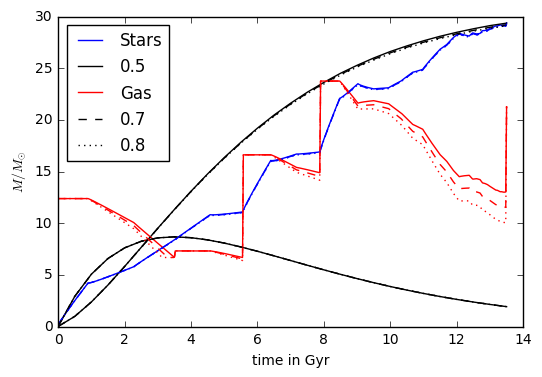

In [227]:
plt.plot(cube541.cube['time'],cube541.cube['stars'],color='blue',linestyle='solid',label='Stars')
#plt.plot(cube136.cube['time'],cube136.cube['stars'],color='blue',linestyle='-.')
#plt.plot(cube28.cube['time'],cube28.cube['stars'],color='blue',linestyle='dotted')
plt.plot(cubebasic28.cube['time'],cubebasic28.cube['stars'],color='black',label='0.5')
plt.plot(cube541.cube['time'],cube541.cube['gas'],color='red',linestyle='solid',label='Gas')
#plt.plot(cube136.cube['time'],cube136.cube['gas'],color='red',linestyle='-.')
#plt.plot(cube28.cube['time'],cube28.cube['gas'],color='red',linestyle='dotted')
plt.plot(cubebasic28.cube['time'],cubebasic28.cube['gas'],color='black')


plt.plot(cube541b.cube['time'],cube541b.cube['stars'],color='blue',linestyle='dashed')
plt.plot(cubebasic28b.cube['time'],cubebasic28b.cube['stars'],color='black',linestyle='dashed',label='0.7')
plt.plot(cube541b.cube['time'],cube541b.cube['gas'],color='red',linestyle='dashed')
plt.plot(cubebasic28b.cube['time'],cubebasic28b.cube['gas'],color='black',linestyle='dashed')

plt.plot(cube541c.cube['time'],cube541c.cube['stars'],color='blue',linestyle='dotted')
plt.plot(cubebasic28c.cube['time'],cubebasic28c.cube['stars'],color='black',linestyle='dotted',label='0.8')
plt.plot(cube541c.cube['time'],cube541c.cube['gas'],color='red',linestyle='dotted')
plt.plot(cubebasic28c.cube['time'],cubebasic28c.cube['gas'],color='black',linestyle='dotted')

#plt.plot(prescribed_sfr.t,prescribed_sfr.sfr)
plt.xlabel('time in Gyr')
plt.ylabel(r'$M/M_{\odot}$')
plt.legend(loc=2)

### Metallicity Evolution (v. Outflow fraction)

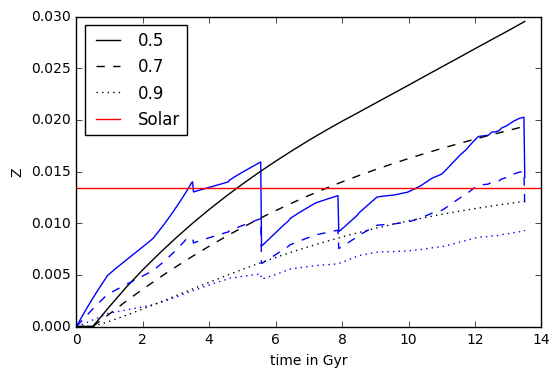

In [230]:
plt.plot(cube541.cube['time'],cube541.cube['Z'],color='blue',linestyle='solid')
#plt.plot(cube136.cube['time'],cube136.cube['Z'],color='black',linestyle='-.',label='0.1 Gyr')
#plt.plot(cube28.cube['time'],cube28.cube['Z'],color='black',linestyle='dotted',label='0.5 Gyr')
plt.plot(cubebasic28.cube['time'],cubebasic28.cube['Z'],color='black',label='0.5')

plt.plot(cube541b.cube['time'],cube541b.cube['Z'],color='blue',linestyle='dashed')
plt.plot(cubebasic28b.cube['time'],cubebasic28b.cube['Z'],color='black',linestyle='dashed',label='0.7')

plt.plot(cube541c.cube['time'],cube541c.cube['Z'],color='blue',linestyle='dotted')
plt.plot(cubebasic28c.cube['time'],cubebasic28c.cube['Z'],color='black',linestyle='dotted',label='0.9')

plt.plot((0,14),(basic_solar.z,basic_solar.z),color='r',label='Solar')

plt.xlabel('time in Gyr')
plt.ylabel('Z')
plt.legend(loc=2)

plt.savefig('Prescribed_Z_timestep.png', bbox_inches='tight')

### Abundance Evolution (v. Outflow fraction)

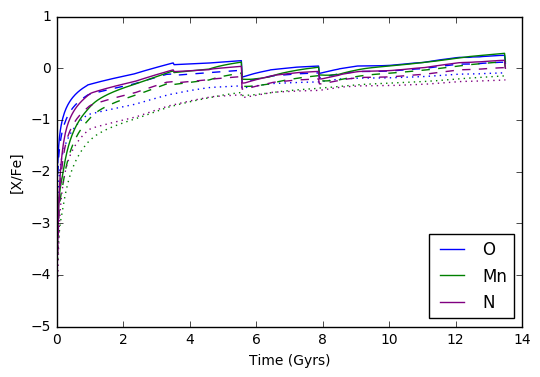

In [289]:
plot(abundances541['time'][1:],abundances541['O'][1:] ,color='blue'  ,linestyle='solid', label = 'O')
plot(abundances541b['time'][1:],abundances541b['O'][1:] ,color='blue'  ,linestyle='dashed')
plot(abundances541c['time'][1:],abundances541c['O'][1:] ,color='blue'  ,linestyle='dotted')

plot(abundances541['time'][1:],abundances541['Mn'][1:],color='green' ,linestyle='solid', label = 'Mn')
plot(abundances541b['time'][1:],abundances541b['Mn'][1:],color='green' ,linestyle='dashed')
plot(abundances541c['time'][1:],abundances541c['Mn'][1:],color='green' ,linestyle='dotted')

plot(abundances541['time'][1:],abundances541['N'][1:],color='purple',linestyle='solid', label = 'N')
plot(abundances541b['time'][1:],abundances541b['N'][1:],color='purple',linestyle='dashed')
plot(abundances541c['time'][1:],abundances541c['N'][1:],color='purple',linestyle='dotted')


#plot(abundances136['time'][1:],abundances136['O'][1:],linestyle='-.',color='blue'  )
#plot(abundances136['time'][1:],abundances136['Mn'][1:],linestyle='-.',color='green' )
#plot(abundances136['time'][1:],abundances136['N'][1:],linestyle='-.',color='purple')
#plot(abundances136['time'][1:],abundances136['Fe'][1:],linestyle='-.',color='black')
#
#plot(abundances28['time'][1:],abundances28['O'][1:],linestyle='dotted',color='blue'  )
#plot(abundances28['time'][1:],abundances28['Mn'][1:],linestyle='dotted',color='green' )
#plot(abundances28['time'][1:],abundances28['N'][1:],linestyle='dotted',color='purple')
#plot(abundances28['time'][1:],abundances28['Fe'][1:],linestyle='dotted',color='black')

plt.xlabel('Time (Gyrs)')
plt.ylabel('[X/Fe]')
plt.legend(loc=4)

### Relative Abundance Evolution (v. Outflow Fraction)

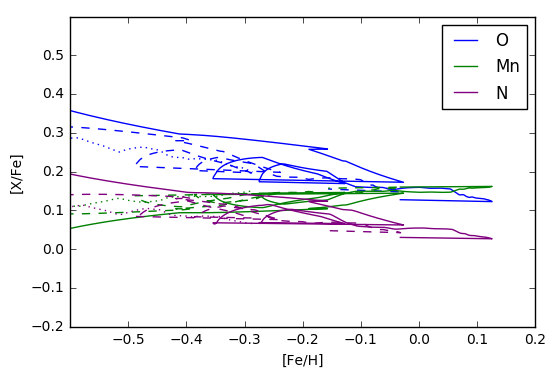

In [251]:
plot(abundances541['Fe'][1:],abundances541['O'][1:]-abundances541['Fe'][1:] ,color='blue'  ,linestyle='solid', label = 'O')
plot(abundances541b['Fe'][1:],abundances541b['O'][1:]-abundances541b['Fe'][1:] ,color='blue'  ,linestyle='dashed')
plot(abundances541c['Fe'][1:],abundances541c['O'][1:]-abundances541c['Fe'][1:] ,color='blue'  ,linestyle='dotted')
plot(abundances541['Fe'][1:],abundances541['Mn'][1:]-abundances541['Fe'][1:],color='green' ,linestyle='solid', label = 'Mn')
plot(abundances541b['Fe'][1:],abundances541b['Mn'][1:]-abundances541b['Fe'][1:],color='green' ,linestyle='dashed')
plot(abundances541c['Fe'][1:],abundances541c['Mn'][1:]-abundances541c['Fe'][1:],color='green' ,linestyle='dotted')
plot(abundances541['Fe'][1:],abundances541['N'][1:]-abundances541['Fe'][1:] ,color='purple',linestyle='solid', label = 'N')
plot(abundances541b['Fe'][1:],abundances541b['N'][1:]-abundances541b['Fe'][1:] ,color='purple',linestyle='dashed')
plot(abundances541c['Fe'][1:],abundances541c['N'][1:]-abundances541c['Fe'][1:] ,color='purple',linestyle='dotted')


#plot(abundances136['Fe'][1:],abundances136['O'][1:]-abundances136['Fe'][1:] ,linestyle='-.',color='blue'  )
#plot(abundances136['Fe'][1:],abundances136['Mn'][1:]-abundances136['Fe'][1:],linestyle='-.',color='green' )
#plot(abundances136['Fe'][1:],abundances136['N'][1:]-abundances136['Fe'][1:] ,linestyle='-.',color='purple')


#plot(abundances28['Fe'][1:],abundances28['O'][1:]-abundances28['Fe'][1:] ,linestyle='dotted',color='blue'  )
#plot(abundances28['Fe'][1:],abundances28['Mn'][1:]-abundances28['Fe'][1:],linestyle='dotted',color='green' )
#plot(abundances28['Fe'][1:],abundances28['N'][1:]-abundances28['Fe'][1:] ,linestyle='dotted',color='purple')
plt.xlabel('[Fe/H]')
plt.ylabel('[X/Fe]')
plt.legend(loc=1)
plt.xlim(-0.6,0.2)
plt.ylim(-0.2,0.6)

### MDF (v. Outflow Fraction)

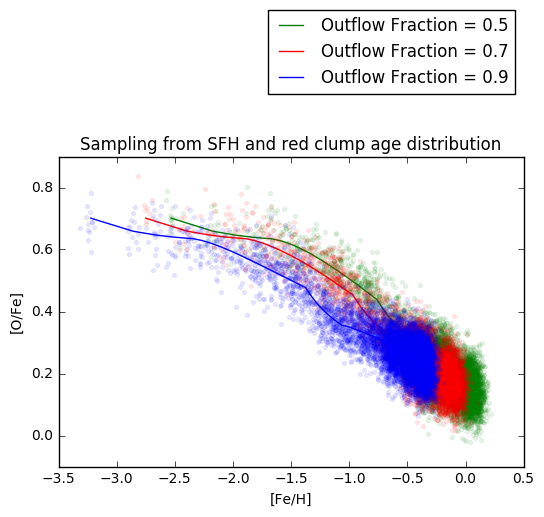

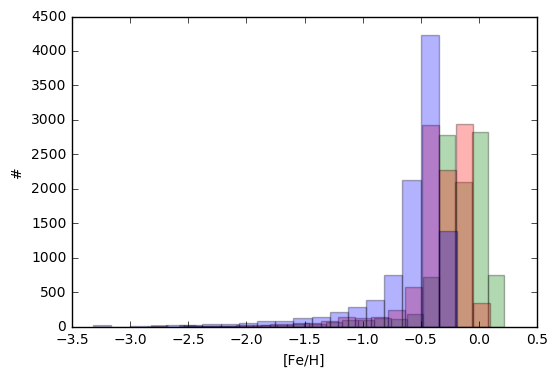

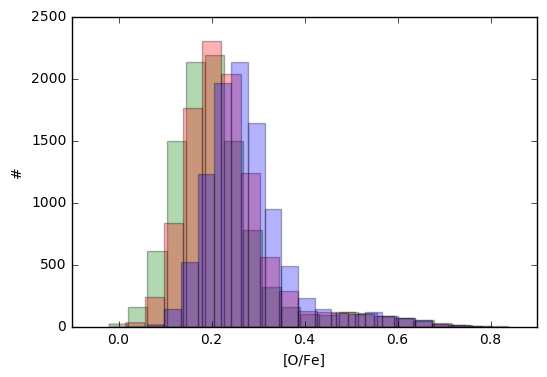

In [358]:
from Chempy.data_to_test import sample_stars

sample_size = 10000
x541,y541 = sample_stars(cube541.cube['sfr'][1:],selection541[1:],abundances541['Fe'][1:],abundances541['O'][1:]-abundances541['Fe'][1:],float(basic_solar.table['error'][np.where(basic_solar.table['Symbol']=='Fe')]),float(basic_solar.table['error'][np.where(basic_solar.table['Symbol']=='O')]),int(sample_size))
x541b,y541b = sample_stars(cube541b.cube['sfr'][1:],selection541[1:],abundances541b['Fe'][1:],abundances541b['O'][1:]-abundances541b['Fe'][1:],float(basic_solar.table['error'][np.where(basic_solar.table['Symbol']=='Fe')]),float(basic_solar.table['error'][np.where(basic_solar.table['Symbol']=='O')]),int(sample_size))
x541c,y541c = sample_stars(cube541c.cube['sfr'][1:],selection541[1:],abundances541c['Fe'][1:],abundances541c['O'][1:]-abundances541c['Fe'][1:],float(basic_solar.table['error'][np.where(basic_solar.table['Symbol']=='Fe')]),float(basic_solar.table['error'][np.where(basic_solar.table['Symbol']=='O')]),int(sample_size))



plt.plot(x541,y541,"g.", alpha = 0.1)#, label = '(%d) synthesized red clum stars' %(int(sample_size)))
plt.plot(abundances541['Fe'][1:],abundances541['O'][1:]-abundances541['Fe'][1:], 'g', label = 'Outflow Fraction = 0.5')
plt.plot(x541b,y541b,"r.", alpha = 0.1)#, label = '(%d) synthesized red clum stars' %(int(sample_size)))
plt.plot(abundances541b['Fe'][1:],abundances541b['O'][1:]-abundances541b['Fe'][1:], 'r', label = 'Outflow Fraction = 0.7')
plt.plot(x541c,y541c,"b.", alpha = 0.1)#, label = '(%d) synthesized red clum stars' %(int(sample_size)))
plt.plot(abundances541c['Fe'][1:],abundances541c['O'][1:]-abundances541c['Fe'][1:], 'b', label = 'Outflow Fraction = 0.9')
plt.xlabel('[Fe/H]')
plt.ylabel('[O/Fe]')
plt.title("Sampling from SFH and red clump age distribution")
plt.legend(bbox_to_anchor = [1,1.5])
plt.show()

plt.hist(x541,20,color='g',alpha=0.3)
plt.hist(x541b,20,color='r',alpha=0.3)
plt.hist(x541c,20,color='b',alpha=0.3)
plt.xlabel('[Fe/H]')
plt.ylabel('#')
plt.show()

plt.hist(y541,20,color='g',alpha=0.3)
plt.hist(y541b,20,color='r',alpha=0.3)
plt.hist(y541c,20,color='b',alpha=0.3)
plt.xlabel('[O/Fe]')
plt.ylabel('#')
plt.show()

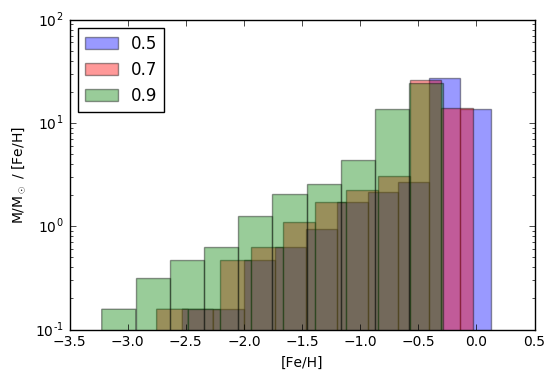

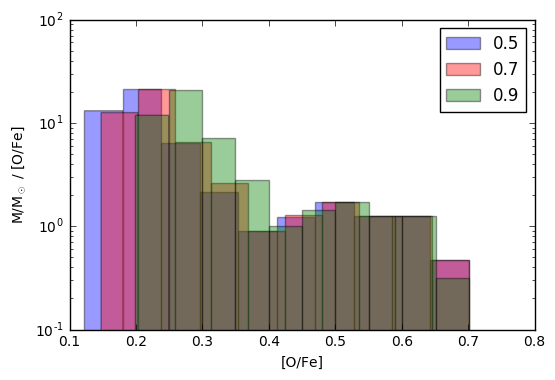

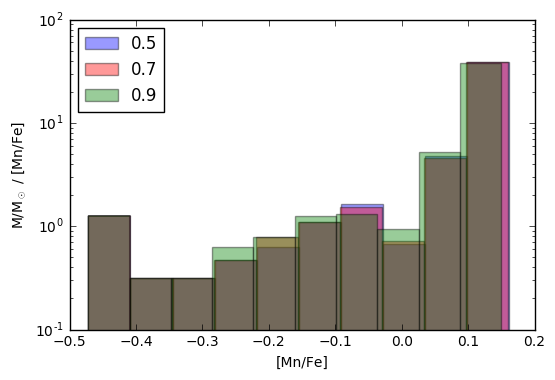

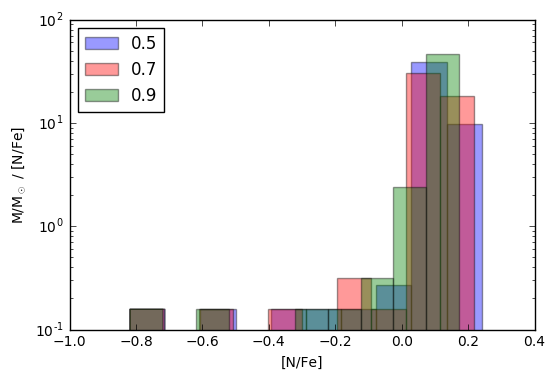

In [296]:
plt.hist(abundances541['Fe'][1:], weights=abundances541['weights'][1:],alpha=0.4,color='b',label='0.5')
plt.hist(abundances541b['Fe'][1:], weights=abundances541b['weights'][1:],alpha=0.4,color='r',label='0.7')
plt.hist(abundances541c['Fe'][1:], weights=abundances541c['weights'][1:],alpha=0.4,color='g',label='0.9')
plt.xlabel('[Fe/H]')
plt.ylabel(r'M/M$_\odot$ / [Fe/H]')
plt.yscale('log')
plt.legend(loc=2)
plt.show()

plt.hist(abundances541['O'][1:]-abundances541['Fe'][1:], weights=abundances541['weights'][1:],alpha=0.4,color='b',label='0.5')
plt.hist(abundances541b['O'][1:]-abundances541b['Fe'][1:], weights=abundances541b['weights'][1:],alpha=0.4,color='r',label='0.7')
plt.hist(abundances541c['O'][1:]-abundances541c['Fe'][1:], weights=abundances541c['weights'][1:],alpha=0.4,color='g',label='0.9')
plt.xlabel('[O/Fe]')
plt.ylabel(r'M/M$_\odot$ / [O/Fe]')
plt.yscale('log')
plt.legend()
plt.show()

plt.hist(abundances541['Mn'][1:]-abundances541['Fe'][1:], weights=abundances541['weights'][1:],alpha=0.4,color='b',label='0.5')
plt.hist(abundances541b['Mn'][1:]-abundances541b['Fe'][1:], weights=abundances541b['weights'][1:],alpha=0.4,color='r',label='0.7')
plt.hist(abundances541c['Mn'][1:]-abundances541c['Fe'][1:], weights=abundances541c['weights'][1:],alpha=0.4,color='g',label='0.9')
plt.xlabel('[Mn/Fe]')
plt.ylabel(r'M/M$_\odot$ / [Mn/Fe]')
plt.yscale('log')
plt.legend(loc=2)
plt.show()

plt.hist(abundances541['N'][1:]-abundances541['Fe'][1:], weights=abundances541['weights'][1:],alpha=0.4,color='b',label='0.5')
plt.hist(abundances541b['N'][1:]-abundances541b['Fe'][1:], weights=abundances541b['weights'][1:],alpha=0.4,color='r',label='0.7')
plt.hist(abundances541c['N'][1:]-abundances541c['Fe'][1:], weights=abundances541c['weights'][1:],alpha=0.4,color='g',label='0.9')
plt.xlabel('[N/Fe]')
plt.ylabel(r'M/M$_\odot$ / [N/Fe]')
plt.yscale('log')
plt.legend(loc=2)
plt.show()

#plt.hist(abundancesbasic28['Fe'][1:], weights=abundancesbasic28['weights'][1:],alpha=0.4,color='b')
#plt.hist(abundancesbasic28b['Fe'][1:], weights=abundancesbasic28b['weights'][1:],alpha=0.4,color='r')
#plt.hist(abundancesbasic28c['Fe'][1:], weights=abundancesbasic28c['weights'][1:],alpha=0.4,color='g')
#plt.xlabel('[Fe/H]')
#plt.ylabel(r'M/M$_\odot$ / [Fe/H]')
#plt.yscale('log')
#plt.show()

# Total Mass

In [324]:
cube136 = []
abundances136 = []
for i in np.arange(0,5,1):
    a = ModelParameters()
    a.time_steps = 136
    a.name_infall_index = 0
    a.name_infall = 'primordial'
    a.basic_sfr_index = 2
    a.basic_sfr_name = 'prescribed'
    a.mass_factor = 1.
    a.name_of_file = '../Chempy/input/Daniel_Weisz/ic1613.lcid.final.sfh'
    a.total_mass = np.power(100,i+1.)
    cube136.append(Chempy(a)[0])
    abundances136.append(Chempy(a)[1])

/Users/Nathan/anaconda/lib/python3.5/site-packages/Chempy/making_abundances.py:54: RuntimeWarning: divide by zero encountered in log10
  cube_abundances[item] = np.where(cube_abundances[item] == 0. , -np.inf, np.log10(cube_abundances[item]) + 12.)
/Users/Nathan/anaconda/lib/python3.5/site-packages/Chempy/making_abundances.py:54: RuntimeWarning: invalid value encountered in log10
  cube_abundances[item] = np.where(cube_abundances[item] == 0. , -np.inf, np.log10(cube_abundances[item]) + 12.)


100.0
10000.0
1000000.0
100000000.0


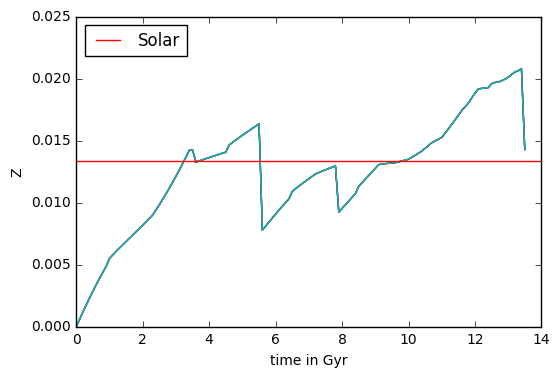

In [326]:
for i in np.arange(0,4,1):
    print(np.power(100,i+1.))
    plt.plot(cube136[i].cube['time'],cube136[i].cube['Z'])

plt.plot((0,14),(basic_solar.z,basic_solar.z),color='r',label='Solar')

plt.xlabel('time in Gyr')
plt.ylabel('Z')
plt.legend(loc=2)


/Users/Nathan/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


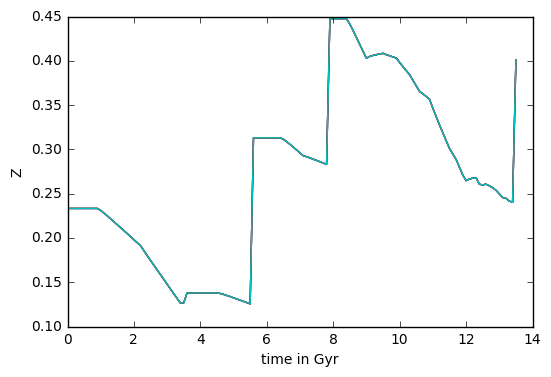

In [331]:
for i in np.arange(0,4,1):
    plt.plot(cube136[i].cube['time'],cube136[i].cube['gas']/np.power(100,i+1.))


plt.xlabel('time in Gyr')
plt.ylabel('Z')
plt.legend(loc=2)

plt.show()

# Misc

In [220]:
Obs = np.genfromtxt('../Chempy/input/Daniel_Weisz/ic1613.lcid.final.sfh', names = True)
Obs['time_l'] = np.power(10,Obs['time_l'])/1e9
Obs['time_u'] = np.power(10,Obs['time_u'])/1e9

#Obs['mean_Z'][Obs['mean_Z'] == 0] = np.nan

/Users/Nathan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/Nathan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/Users/Nathan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


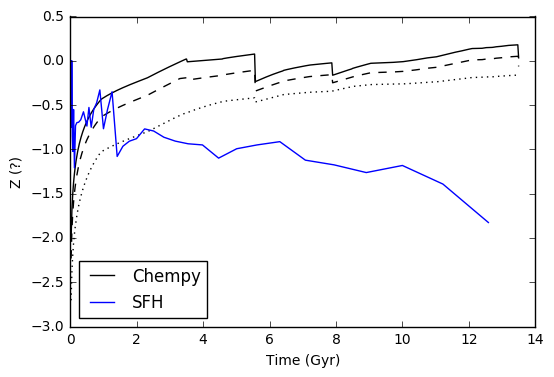

In [286]:
plt.plot(cube541.cube['time'],np.log10(cube541.cube['Z']/basic_solar.z),color='black',linestyle='solid',label='Chempy')
plt.plot(cube541b.cube['time'],np.log10(cube541b.cube['Z']/basic_solar.z),color='black',linestyle='dashed')
plt.plot(cube541c.cube['time'],np.log10(cube541c.cube['Z']/basic_solar.z),color='black',linestyle='dotted')
#plt.plot(Obs['time_l'],np.power(10,Obs['mean_Z']),color='blue')
plt.plot(Obs['time_l'],Obs['mean_Z'],color='blue',label='SFH')
plt.legend(loc=3)
plt.xlabel('Time (Gyr)')
plt.ylabel('Z (?)')

In [44]:
print(a.to_optimize)
print(a.p0)

['high_mass_slope' 'log10_N_0' 'log10_sn1a_time_delay'
 'log10_starformation_efficiency' 'sfr_scale' 'outflow_feedback_fraction'
 'log10_gas_reservoir_mass_factor']
[-2.29 -2.75 -0.8  -0.3   3.5   0.5   0.3 ]


array([-2.29, -2.75, -0.8 , -0.3 ,  3.5 ,  0.5 ,  0.3 ])

In [174]:
a.observational_constraints_index

['gas_reservoir', 'sn_ratio', 'sol_norm']

In [193]:
a.element_names

['He',
 'C',
 'N',
 'O',
 'F',
 'Ne',
 'Na',
 'Mg',
 'Al',
 'Si',
 'P',
 'S',
 'Ar',
 'K',
 'Ca',
 'Ti',
 'V',
 'Cr',
 'Mn',
 'Fe',
 'Co',
 'Ni']

In [178]:
a.SSP_parameters_to_optimize

['high_mass_slope', 'log10_N_0', 'log10_sn1a_time_delay']

In [48]:
arc = np.load('../Chempy/input/stars/Arcturus.npy')

In [51]:
arc

array([ (-0.52, 0.5, 0.11, 0.37, 0.34, 0.33, 0.2, 0.11, 0.19, 0.24, 0.2, -0.05, -0.21, 0.09, 0.06, 0.22, 7.1),
       (0.04, 0.03, 0.03, 0.03, 0.03, 0.04, 0.07, 0.04, 0.06, 0.05, 0.05, 0.04, 0.04, 0.04, 0.03, 0.06, 1.2)], 
      dtype=[('Fe', '<f8'), ('O', '<f8'), ('Na', '<f8'), ('Mg', '<f8'), ('Al', '<f8'), ('Si', '<f8'), ('K', '<f8'), ('Ca', '<f8'), ('Sc', '<f8'), ('Ti', '<f8'), ('V', '<f8'), ('Cr', '<f8'), ('Mn', '<f8'), ('Co', '<f8'), ('Ni', '<f8'), ('Zn', '<f8'), ('age', '<f8')])